# LBMA Preços do Ouro (1968 - 2023)

Preços Diários Históricos do Ouro desde 1968

## Sobre o conjunto de dados

O preço do ouro LBMA é um preço de referência diário do ouro que é definido duas vezes por dia pela London Bullion Market Association (LBMA). O preço é usado como um ponto de referência para compradores e vendedores de ouro em todo o mundo e é amplamente considerado o padrão global para o preço do ouro.

O preço do ouro LBMA é definido por um grupo de bancos que são membros do LBMA, que inclui alguns dos maiores bancos de barras de ouro do mundo. Esses bancos usam uma plataforma de leilão eletrônico chamada ICE Benchmark Administration (IBA) para definir o preço. O leilão acontece duas vezes por dia, uma vez de manhã e uma vez à tarde, e é baseado em lances e ofertas em tempo real dos bancos participantes.

O preço do ouro LBMA é cotado em dólares americanos por onça troy e é baseado no preço à vista do ouro. O preço à vista é o preço de mercado atual para a entrega imediata de ouro. O preço do ouro LBMA é calculado utilizando a mediana das propostas e ofertas apresentadas pelos bancos participantes. O preço final é publicado no site da LBMA e é amplamente utilizado pelos participantes do mercado para avaliar suas participações de ouro e liquidar transações.

Além do preço do ouro LBMA, o LBMA também define preços de referência para prata, platina e paládio. Estes preços de referência são também amplamente utilizados no mercado dos metais preciosos como pontos de referência para a fixação de preços e liquidação.

In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

tabela = pd.read_csv(r'DtScience\LBMA-GOLD.csv')
display(tabela)

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2023-02-24,1824.10,1810.95,1517.290,1516.13,1722.13,1717.87
1,2023-02-23,1826.95,1826.05,1518.010,1515.07,1724.64,1721.97
2,2023-02-22,1833.45,1835.75,1518.460,1516.33,1723.63,1723.03
3,2023-02-21,1833.20,1836.85,1516.420,1519.26,1719.91,1723.70
4,2023-02-20,1844.20,1845.80,1533.270,1532.94,1725.99,1726.19
...,...,...,...,...,...,...,...
13934,1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN
13935,1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
13936,1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
13937,1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN


In [13]:
# identificando e removendo valores vazios
display(tabela.info())
# Tratar valores vazios
tabela = tabela.dropna()
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13939 entries, 0 to 13938
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       13939 non-null  object 
 1   USD (AM)   13938 non-null  float64
 2   USD (PM)   13792 non-null  float64
 3   GBP (AM)   13928 non-null  float64
 4   GBP (PM)   13781 non-null  float64
 5   EURO (AM)  6102 non-null   float64
 6   EURO (PM)  6055 non-null   float64
dtypes: float64(6), object(1)
memory usage: 762.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 6055 entries, 0 to 6101
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6055 non-null   object 
 1   USD (AM)   6055 non-null   float64
 2   USD (PM)   6055 non-null   float64
 3   GBP (AM)   6055 non-null   float64
 4   GBP (PM)   6055 non-null   float64
 5   EURO (AM)  6055 non-null   float64
 6   EURO (PM)  6055 non-null   float64
dtypes: float64(6), object(1)
memory usage: 378.4+ KB


None

In [14]:
tabela['Dia'] = tabela['Date'].apply(lambda x: x.split('-')[2])
tabela['Mes'] = tabela['Date'].apply(lambda x: x.split('-')[1])
tabela['Ano'] = tabela['Date'].apply(lambda x: x.split('-')[0])

tabela = tabela.drop('Date', axis=1)
tabela = tabela.drop('Dia', axis=1)
tabela = tabela.drop('Mes', axis=1)
tabela

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Ano
0,1824.10,1810.95,1517.290,1516.130,1722.130,1717.870,2023
1,1826.95,1826.05,1518.010,1515.070,1724.640,1721.970,2023
2,1833.45,1835.75,1518.460,1516.330,1723.630,1723.030,2023
3,1833.20,1836.85,1516.420,1519.260,1719.910,1723.700,2023
4,1844.20,1845.80,1533.270,1532.940,1725.990,1726.190,2023
...,...,...,...,...,...,...,...
6097,290.90,290.90,177.000,177.324,249.293,250.992,1999
6098,288.60,289.95,174.486,175.887,247.089,248.351,1999
6099,287.15,287.65,173.191,173.733,244.258,245.331,1999
6100,287.00,287.15,173.362,172.947,242.809,242.918,1999


In [15]:
df_ouro = tabela.groupby('Ano')[['USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)',
                                        'EURO (PM)']].sum().reset_index()
display(df_ouro)

,Ano,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,1999,69985.60,69921.75,43236.137,43193.522,65647.567,65603.052
1,2000,69834.40,69775.50,46114.226,46075.255,75668.983,75659.895
2,2001,68056.90,68030.00,47256.054,47246.780,75993.429,76003.233
3,2002,77451.40,77419.30,51553.824,51531.595,82035.589,82013.701
4,2003,91221.35,91193.55,55801.313,55770.752,80681.666,80634.106
5,2004,103141.00,103109.90,56298.041,56274.478,83068.583,82924.128
6,2005,111120.35,111111.95,61199.836,61211.475,89534.702,89579.195
7,2006,151037.70,150943.05,81973.970,81909.214,120189.666,120129.921
8,2007,174550.35,174542.00,87114.184,87100.069,127251.832,127215.297
9,2008,219880.80,219734.60,118890.266,118814.228,149518.292,149457.248


In [16]:
df_ouro = df_ouro.drop(24, axis=0)

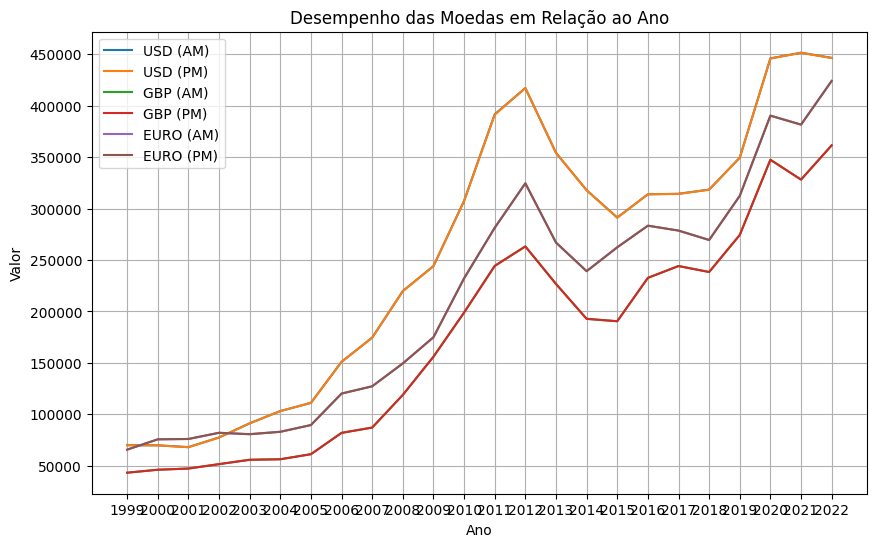

In [17]:
import matplotlib.pyplot as plt

colunas_moedas = ['USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)', 'EURO (PM)']

# Crie o gráfico de linhas
plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico conforme necessário
for coluna in colunas_moedas:
    plt.plot(df_ouro['Ano'], df_ouro[coluna], label=coluna)

plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Desempenho das Moedas em Relação ao Ano')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
fig = px.line(df_ouro, x='Ano', y=['USD (AM)', 'USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)', 'EURO (PM)'],
              labels={'value': 'Valor', 'variable': 'Ouro'},
              title='Desempenho do Ouro em Relação ao Ano')

fig.show()